# tsam - Optimal combination of segments and periods 
Determine the optimal combination of segments and periods during the aggregation of the time series
Date: 27.04.2022

Author: Leander Kotzur

Import pandas and the relevant time series aggregation class

In [1]:
%load_ext autoreload
%autoreload 2
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import tsam.timeseriesaggregation as tsam
%matplotlib inline

### Input data 

Read in time series from testdata.csv with pandas

In [66]:
raw = pd.read_csv('testdata.csv', index_col = 0)
raw=raw.rename(columns={'T': 'Temperature [°C]', 'Load':'Load [kW]', 'Wind':'Wind [m/s]', 'GHI': 'Solar [W/m²]'})

Create a plot function for a visual comparison of the time series

In [72]:
def plotTS(plot_data, raw_data, periodlength=24):
    fig, axes = plt.subplots(figsize = [8, 7], dpi = 100, nrows = raw_data.shape[1], ncols = 1)
    for i, column in enumerate(raw.columns):
        data = plot_data[column]
        stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), periodlength)
        cax = axes[i].imshow(stacked.values.T, interpolation = 'nearest', vmin = raw_data[column].min(), vmax = raw_data[column].max(), origin='lower')
        axes[i].set_aspect('auto')  
        axes[i].set_ylabel('Hour')
        plt.xlabel('Day in the year')

        cbar=plt.colorbar(cax, ax=axes[i], pad=0.01, aspect=7)
        cbar.set_label(column)

    fig.subplots_adjust(right = 1.1, hspace = 0.05)

Plot an example series - in this case the temperature

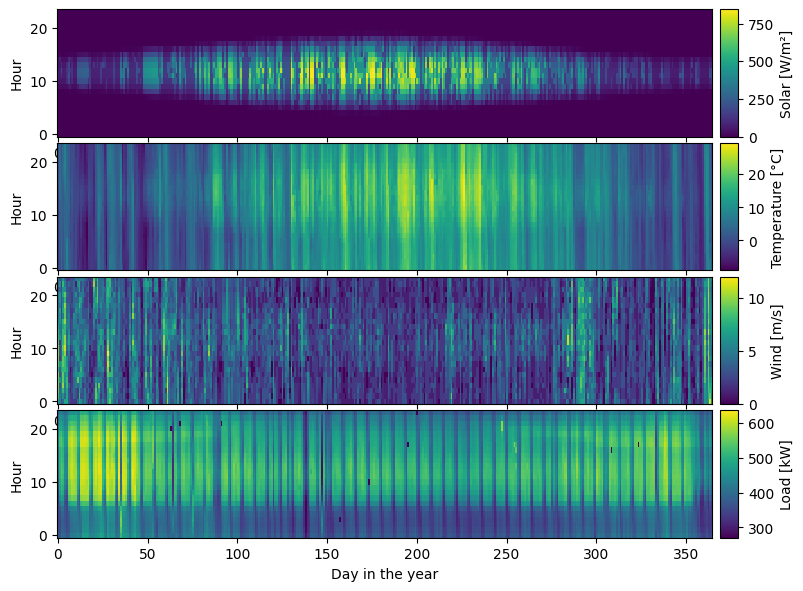

In [73]:
plotTS(raw,raw,periodlength=24)

### Hierarchical aggregation with segments in combination with duration representation

In [75]:
aggregation = tsam.TimeSeriesAggregation(
    raw,
    hoursPerPeriod=24,
    clusterMethod="hierarchical",
    representationMethod="durationRepresentation",
    distributionPeriodWise=False,
    rescaleClusterPeriods=False,
    segmentation=True,
)


Create the the number of typical periods with a set of segments for a data reduction of to ~10%. This may take some time...

In [76]:
aggregation.identifyOptimalSegmentPeriodCombination(dataReduction=0.1)

Load [kW]  Solar [W/m²]  Temperature [°C]  \
    Segment Step Segment Duration                                               
0   0            8                 379.015164      0.000000         -0.487500   
    1            2                 425.718560     57.500000          0.083333   
    2            4                 455.425260    138.916667          0.916667   
    3            3                 446.711770      5.000000          0.444444   
    4            3                 466.619092      0.000000         -0.266667   
...                                       ...           ...               ...   
109 2            4                 515.914367    401.916667         12.350000   
    3            1                 524.960837    605.333333         15.433333   
    4            2                 500.817524    323.166667         16.050000   
    5            5                 482.105538     42.600000         14.213333   
    6            3                 421.031900      0.000000         11.566667   

                                   Wind [m/s]  
    Segment Step Segment Duration              
0   0            8                       2.00  
    1            2                       2.00  
    2            4                       2.65  
    3            3                       3.00  
    4            3                       3.00  
...                                       ...  
109 2            4                       1.00  
    3            1                       2.00  
    4            2                       2.00  
    5            5                       1.20  
    6            3                       3.00  

[770 rows x 4 columns]

Get the number of typical periods

In [77]:
aggregation.noTypicalPeriods

110

And the number of segments

In [78]:
aggregation.noSegments

7

And show the results

In [79]:
predictedPeriods = aggregation.predictOriginalData()

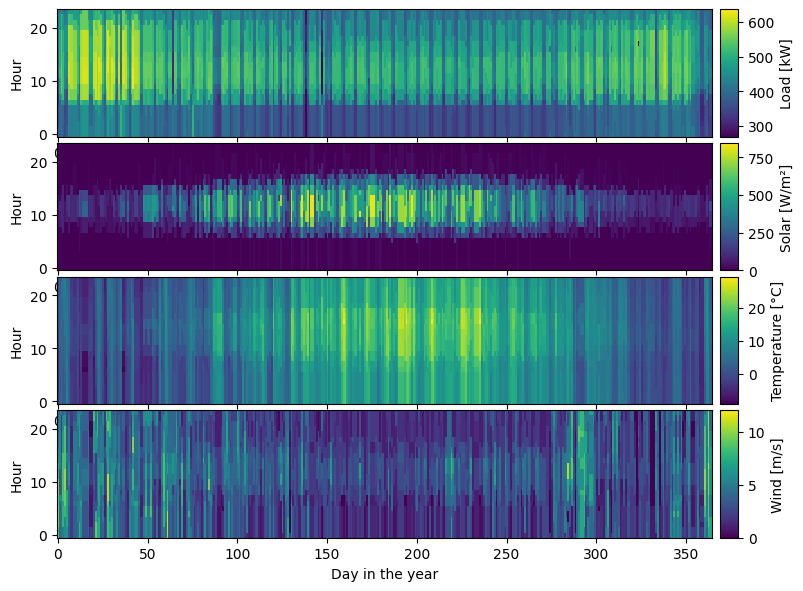

In [80]:
plotTS(predictedPeriods, raw, periodlength=aggregation.hoursPerPeriod)

## Now show it for a parameter variation as animation

In [81]:
from matplotlib.animation import FuncAnimation

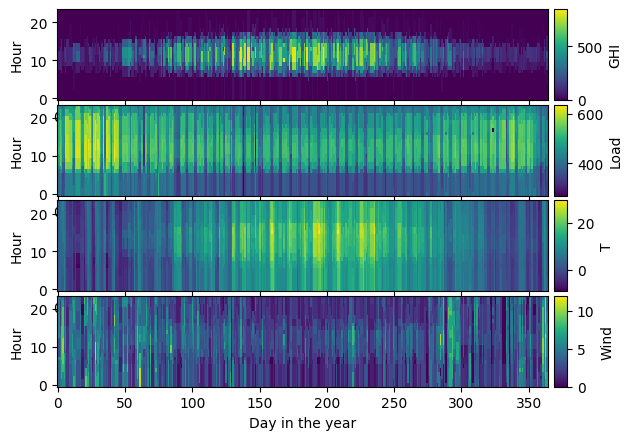

In [56]:
fig, axes = plt.subplots(figsize = [6, 5], dpi = 100, nrows = raw.shape[1], ncols = 1)
for i, column in enumerate(raw.columns):
    data = predictedPeriods[column]
    stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(data), aggregation.hoursPerPeriod)
    cax = axes[i].imshow(stacked.values.T, interpolation = 'nearest', vmin = raw[column].min(), vmax = raw[column].max(), origin='lower')
    axes[i].set_aspect('auto')  
    axes[i].set_ylabel('Hour')
    plt.xlabel('Day in the year')

    cbar=plt.colorbar(cax, ax=axes[i], pad=0.01, aspect=7)
    cbar.set_label(column)

fig.subplots_adjust(right = 1.1, hspace = 0.05)

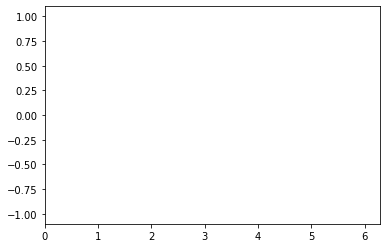

In [83]:
import numpy as np
Figure = plt.figure()
 
# creating a plot
lines_plotted = plt.plot([])    
 
# putting limits on x axis since
# it is a trigonometry function
# (0,2∏)
line_plotted = lines_plotted[0]
 
plt.xlim(0,2*np.pi) 
 
# putting limits on y since it is a
# cosine function
plt.ylim(-1.1,1.1)   
 
# initialising x from 0 to 2∏
x = np.linspace(0,2*np.pi,100)  
 
#initially
y = 0

In [84]:
# function takes frame as an input
def AnimationFunction(frame):
 
    # setting y according to frame
    # number and + x. It's logic
    y = np.cos(x+2*np.pi*frame/100)
 
    # line is set with new values of x and y
    line_plotted.set_data((x, y))

In [85]:
anim_created = FuncAnimation(Figure, AnimationFunction, frames=100, interval=25)

In [87]:
video = anim_created.to_jshtml()


In [88]:
video

'\n<link rel="stylesheet"\nhref="https://maxcdn.bootstrapcdn.com/font-awesome/4.4.0/css/font-awesome.min.css">\n<script language="javascript">\n  function isInternetExplorer() {\n    ua = navigator.userAgent;\n    /* MSIE used to detect old browsers and Trident used to newer ones*/\n    return ua.indexOf("MSIE ") > -1 || ua.indexOf("Trident/") > -1;\n  }\n\n  /* Define the Animation class */\n  function Animation(frames, img_id, slider_id, interval, loop_select_id){\n    this.img_id = img_id;\n    this.slider_id = slider_id;\n    this.loop_select_id = loop_select_id;\n    this.interval = interval;\n    this.current_frame = 0;\n    this.direction = 0;\n    this.timer = null;\n    this.frames = new Array(frames.length);\n\n    for (var i=0; i<frames.length; i++)\n    {\n     this.frames[i] = new Image();\n     this.frames[i].src = frames[i];\n    }\n    var slider = document.getElementById(this.slider_id);\n    slider.max = this.frames.length - 1;\n    if (isInternetExplorer()) {\n      

Now also the days with the minimal temperature are integrated into the typical periods.

### Comparison of the aggregations 
It was shown for the temperature, but both times all four time series have been aggregated. Therefore, we compare here also the duration curves  of the electrical load for the original time series, the aggregation with k-mean, and the hierarchical aggregation including peak periods.

Text(0,0.5,'Duration Load [MW]')

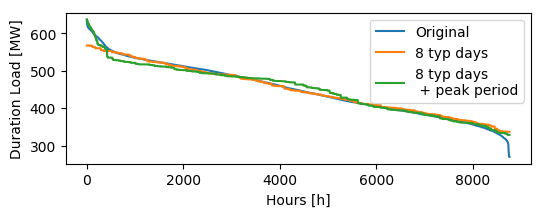

In [19]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = 'Original')
predictedPeriods['Load'].sort_values(ascending=False).reset_index(drop=True).plot(label = '8 typ days')
predictedPeriodsWithEx['Load'].sort_values(
    ascending=False).reset_index(drop=True).plot(label = '8 typ days \n + peak period')
plt.legend()
plt.xlabel('Hours [h]')
plt.ylabel('Duration Load [MW]')

Or as unsorted time series for an example week

Text(0,0.5,'Load [MW]')

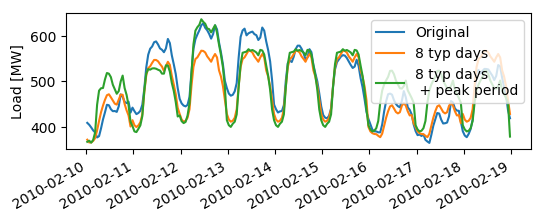

In [20]:
fig, axes = plt.subplots(figsize = [6, 2], dpi = 100, nrows = 1, ncols = 1)
raw['Load']['20100210':'20100218'].plot(label = 'Original')
predictedPeriods['Load']['20100210':'20100218'].plot(label = '8 typ days')
predictedPeriodsWithEx['Load']['20100210':'20100218'].plot(label = '8 typ days \n + peak period')
plt.legend()
plt.ylabel('Load [MW]')